<a href="https://colab.research.google.com/github/Ludw1g84/seed_COT/blob/master/RiskPremiaPortfolio_ETF_BuyAndHold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import csv
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/drive', force_remount=True)

Mounted at /drive


In [ ]:
#Load SPY adjusted data (including dividends)
DataIn_df = pd.read_csv("/drive/My Drive/Invest/Data/ETFs/SPY_1D_ADJ.csv")

DataIn_df['Datetime'] = pd.to_datetime(DataIn_df['time'], format='ISO8601')
DataIn_df.set_index('Datetime', inplace=True)

Close_df = pd.DataFrame(index=DataIn_df.index)
Close_df['SPY'] = DataIn_df['close']

#display(ES_df)

In [ ]:
#Load GLD adjusted data (including dividends)
DataIn_df = pd.read_csv("/drive/My Drive/Invest/Data/ETFs/GLD_1D_ADJ.csv")

DataIn_df['Datetime'] = pd.to_datetime(DataIn_df['time'], format='ISO8601')
DataIn_df.set_index('Datetime', inplace=True)

Temp_df = pd.DataFrame(index=DataIn_df.index)
Temp_df['GLD'] = DataIn_df['close']

Close_df = pd.merge(Close_df,Temp_df, how='inner', on='Datetime')

display(Close_df)

,SPY,GLD
Datetime,,
2004-11-18,81.381355,44.38
2004-11-19,80.476654,44.78
2004-11-22,80.860464,44.95
2004-11-23,80.983831,44.75
2004-11-24,81.175736,45.05
...,...,...
2024-11-26,600.650000,242.95
2024-11-27,598.830000,243.49
2024-11-29,602.550000,245.59


In [ ]:
#Load TLT adjusted data (including dividends)
DataIn_df = pd.read_csv("/drive/My Drive/Invest/Data/ETFs/TLT_1D_ADJ.csv")

DataIn_df['Datetime'] = pd.to_datetime(DataIn_df['time'], format='ISO8601')
DataIn_df.set_index('Datetime', inplace=True)

Temp_df = pd.DataFrame(index=DataIn_df.index)
Temp_df['TLT'] = DataIn_df['close']

Close_df = pd.merge(Close_df,Temp_df, how='inner', on='Datetime')

display(Close_df)

,SPY,GLD,TLT
Datetime,,,
2004-11-18,81.381355,44.38,46.895833
2004-11-19,80.476654,44.78,46.521589
2004-11-22,80.860464,44.95,46.764059
2004-11-23,80.983831,44.75,46.822040
2004-11-24,81.175736,45.05,46.822040
...,...,...,...
2024-11-26,600.650000,242.95,92.050513
2024-11-27,598.830000,243.49,92.688300
2024-11-29,602.550000,245.59,93.644979


In [ ]:
StratNames = ["Strategy3","Strategy4"]
#StratNames = ["Strategy2_Long","Strategy2_Short","Strategy3"]#
print(StratNames)

#Returns_df = pd.DataFrame(columns=StratNames)
DataIn_df = pd.read_csv('/drive/My Drive/Colab Notebooks/Data/'+StratNames[0]+'.csv')
DataIn_df = DataIn_df[['Datetime','Marketposition','Close']]
DataIn_df['Datetime'] = pd.to_datetime(DataIn_df.Datetime.astype(str))
DataIn_df.set_index('Datetime',inplace=True)

Temp_df = DataIn_df[['Close']]
Temp_df.rename(columns={"Close": StratNames[0]}, inplace=True)

Close_df = pd.merge(Close_df,Temp_df, how='inner', on='Datetime')
Marketposition_df = pd.DataFrame(index=Close_df.index)
Marketposition_df[StratNames[0]] = DataIn_df['Marketposition']



for strat in StratNames[1:]:
  print(strat)
  DataIn_df = pd.read_csv('/drive/My Drive/Colab Notebooks/Data/'+strat+'.csv')
  DataIn_df = DataIn_df[['Datetime','Marketposition','Close']]
  DataIn_df['Datetime'] = pd.to_datetime(DataIn_df.Datetime.astype(str))
  DataIn_df.set_index('Datetime',inplace=True)

  Temp_df = DataIn_df[['Close']]
  Temp_df.rename(columns={"Close": strat}, inplace=True)

  Close_df = pd.merge(Close_df,Temp_df, how='inner', on='Datetime')
  Marketposition_df = pd.merge(Marketposition_df,DataIn_df[['Marketposition']], how='inner', on='Datetime')
  Marketposition_df.rename(columns={'Marketposition': strat}, inplace=True)

#print(StratNames)
#display(Close_df)
display(Marketposition_df)

['Strategy3', 'Strategy4']
Strategy4


<ipython-input-116-44f8ea3b061d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Temp_df.rename(columns={"Close": StratNames[0]}, inplace=True)
<ipython-input-116-44f8ea3b061d>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Temp_df.rename(columns={"Close": strat}, inplace=True)


,Strategy3,Strategy4
Datetime,,
2016-05-16,1,1
2016-05-17,0,1
2016-05-18,0,1
2016-05-19,0,1
2016-05-20,0,1
...,...,...
2024-11-25,0,1
2024-11-26,1,1
2024-11-27,0,1


In [ ]:
MarketpositionShift_df = Marketposition_df.shift(-1)
display(MarketpositionShift_df)

Marketposition_df = MarketpositionShift_df

,Strategy3,Strategy4
Datetime,,
2016-05-16,0.0,1.0
2016-05-17,0.0,1.0
2016-05-18,0.0,1.0
2016-05-19,0.0,1.0
2016-05-20,1.0,1.0
...,...,...
2024-11-25,1.0,1.0
2024-11-26,0.0,1.0
2024-11-27,0.0,1.0


In [ ]:
Signal_df = pd.DataFrame(index=Marketposition_df.index, columns=Close_df.columns)

#Strategies first
for col in MarketpositionShift_df.columns:
  if col != 'Strategy2_Short':
    Signal_df[col] = ['BUY' if (mp-mpm1)==1 else 0 for mp, mpm1 in zip(MarketpositionShift_df[col], MarketpositionShift_df[col].shift(1))]
    Signal_df[col] = ['SELL' if (mp-mpm1)==-1 else tr for mp, mpm1, tr in zip(MarketpositionShift_df[col], MarketpositionShift_df[col].shift(1), Signal_df[col])]
    if MarketpositionShift_df[col].iloc[0]==1:
      Signal_df[col].iloc[0] = 0
      Signal_df[col].iloc[1] = 'BUY'
  else:
    Signal_df[col] = ['BUYTOCOVER' if (mp-mpm1)==-1 else 0 for mp, mpm1 in zip(MarketpositionShift_df[col], MarketpositionShift_df[col].shift(1))]
    Signal_df[col] = ['SELLSHORT' if (mp-mpm1)==1 else tr for mp, mpm1, tr in zip(MarketpositionShift_df[col], MarketpositionShift_df[col].shift(1), Signal_df[col])]
    if MarketpositionShift_df[col].iloc[0]==1:
      Signal_df[col].iloc[0] = 'SELLSHORT'



display(Signal_df)

<ipython-input-118-cd922a9c866a>:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Signal_df[col].iloc[0] = 0
<ipython-input-118-cd922a9c866a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

,SPY,GLD,TLT,Strategy3,Strategy4
Datetime,,,,,
2016-05-16,NaN,NaN,NaN,0,0
2016-05-17,NaN,NaN,NaN,0,BUY
2016-05-18,NaN,NaN,NaN,0,0
2016-05-19,NaN,NaN,NaN,0,0
2016-05-20,NaN,NaN,NaN,BUY,0
...,...,...,...,...,...
2024-11-25,NaN,NaN,NaN,BUY,0
2024-11-26,NaN,NaN,NaN,SELL,0
2024-11-27,NaN,NaN,NaN,0,0


In [ ]:
#Load short term interest
DataIn_df = pd.read_csv("/drive/My Drive/Invest/Data/FEDFUNDS.csv")

DataIn_df['Datetime'] = pd.to_datetime(DataIn_df['DATE'], format='%Y-%m-%d')
DataIn_df.set_index('Datetime',inplace=True)
DataIn_df = DataIn_df.drop('DATE',axis=1)

display(DataIn_df)

,FEDFUNDS
Datetime,
1954-07-01,0.80
1954-08-01,1.22
1954-09-01,1.07
1954-10-01,0.85
1954-11-01,0.83
...,...
2023-09-01,5.33
2023-10-01,5.33
2023-11-01,5.33


In [ ]:
Returns_df = Close_df / Close_df.shift(1)

Returns_df.dropna(inplace=True)
display(Returns_df)

,SPY,GLD,TLT,Strategy3,Strategy4
Datetime,,,,,
2016-05-17,0.990670,1.003448,1.001678,1.001087,1.000000
2016-05-18,1.000289,0.982654,0.985764,1.021538,1.000000
2016-05-19,0.996535,0.998085,1.004325,0.981573,1.000000
2016-05-20,1.006317,0.998665,1.000769,1.013177,1.001582
2016-05-23,0.998637,0.997160,1.002228,0.980731,0.999494
...,...,...,...,...,...
2024-11-25,1.003392,0.970541,1.025888,0.992265,1.000000
2024-11-26,1.005221,1.001938,0.996118,0.999857,1.000000
2024-11-27,0.996970,1.002223,1.006929,0.991130,1.000000


In [ ]:
Datetime_df = pd.DataFrame(index=Signal_df.index)
Datetime_df['Datetime'] = Datetime_df.index
Datetime_df['DOW'] = Datetime_df['Datetime'].dt.weekday+1
Datetime_df['Month'] = Datetime_df['Datetime'].dt.month
Datetime_df['TDOM'] = 1
Datetime_df['LTDOM'] = 0

#Compute TDOM
for i in range(1,len(Datetime_df),1):
    if (Datetime_df.iloc[i,Datetime_df.columns.get_loc('Month')] - Datetime_df.iloc[i-1,Datetime_df.columns.get_loc('Month')]) !=0 :
        Datetime_df.iloc[i,Datetime_df.columns.get_loc('TDOM')] = float(1)
    else:
        Datetime_df.iloc[i,Datetime_df.columns.get_loc('TDOM')] = float(Datetime_df.iloc[i-1,Datetime_df.columns.get_loc('TDOM')] + 1)

#Compute LTDOM
for i in range(1,len(Datetime_df),1):
    if (Datetime_df.iloc[i,Datetime_df.columns.get_loc('Month')] - Datetime_df.iloc[i-1,Datetime_df.columns.get_loc('Month')]) !=0 :
      for k in range(1,11,1):
        Datetime_df.iloc[i-k,Datetime_df.columns.get_loc('LTDOM')] = float(k)

#Datetime_df.reset_index(inplace=True)

display(Datetime_df)

,Datetime,DOW,Month,TDOM,LTDOM
Datetime,,,,,
2016-05-16,2016-05-16,1,5,1,0
2016-05-17,2016-05-17,2,5,2,10
2016-05-18,2016-05-18,3,5,3,9
2016-05-19,2016-05-19,4,5,4,8
2016-05-20,2016-05-20,5,5,5,7
...,...,...,...,...,...
2024-11-25,2024-11-25,1,11,17,4
2024-11-26,2024-11-26,2,11,18,3
2024-11-27,2024-11-27,3,11,19,2


In [ ]:
for sym in ['SPY','TLT','GLD']:    #
  Signal_df[sym] = ['REBALANCE' if ltdom==1 else 0 for ltdom in Datetime_df['LTDOM']]

Signal_df['Strategy4'] = ['READJUST_DT' if ltdom==1 else 0 for ltdom in Datetime_df['LTDOM']]

display(Signal_df)


,SPY,GLD,TLT,Strategy3,Strategy4
Datetime,,,,,
2016-05-16,0,0,0,0,0
2016-05-17,0,0,0,0,0
2016-05-18,0,0,0,0,0
2016-05-19,0,0,0,0,0
2016-05-20,0,0,0,BUY,0
...,...,...,...,...,...
2024-11-25,0,0,0,BUY,0
2024-11-26,0,0,0,SELL,0
2024-11-27,0,0,0,0,0


In [ ]:
Returns_df['Interest'] = 1

DataIn_df['Year'] = DataIn_df.index.year
DataIn_df['Month'] = DataIn_df.index.month

date_m1 = Returns_df.index[0]

for date in Returns_df.index[1:]:
  if Datetime_df.loc[date,'TDOM']==1:
    year = date.year
    month = date.month

    if(year<2024):
      #print(year)
      #print(month)

      rate = DataIn_df[(DataIn_df['Month']==month) & (DataIn_df['Year']==year)]['FEDFUNDS'].iloc[-1] / 100
      Returns_df.loc[date,'Interest'] = (1+rate)**(1/252)

  else:
    Returns_df.loc[date,'Interest'] = Returns_df.loc[date_m1,'Interest']

  date_m1 = date


display(Returns_df)

<ipython-input-123-9b4d139c75ed>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.0000150508999253' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Returns_df.loc[date,'Interest'] = (1+rate)**(1/252)


,SPY,GLD,TLT,Strategy3,Strategy4,Interest
Datetime,,,,,,
2016-05-17,0.990670,1.003448,1.001678,1.001087,1.000000,1.0
2016-05-18,1.000289,0.982654,0.985764,1.021538,1.000000,1.0
2016-05-19,0.996535,0.998085,1.004325,0.981573,1.000000,1.0
2016-05-20,1.006317,0.998665,1.000769,1.013177,1.001582,1.0
2016-05-23,0.998637,0.997160,1.002228,0.980731,0.999494,1.0
...,...,...,...,...,...,...
2024-11-25,1.003392,0.970541,1.025888,0.992265,1.000000,1.0
2024-11-26,1.005221,1.001938,0.996118,0.999857,1.000000,1.0
2024-11-27,0.996970,1.002223,1.006929,0.991130,1.000000,1.0


In [ ]:
Vola_df = pd.DataFrame(index=Returns_df.index)

period=60

Vola_df = np.sqrt(252)*100*Returns_df.rolling(period).std().shift(1)
Vola_df.dropna(inplace=True)

display(Vola_df)

,SPY,GLD,TLT,Strategy3,Strategy4,Interest
Datetime,,,,,,
2016-08-11,12.780649,17.839970,13.712155,27.596447,1.592461,0.009159
2016-08-12,12.619348,17.904733,13.868807,28.153786,1.626188,0.008782
2016-08-15,12.625168,17.513637,13.575415,27.801891,1.626188,0.008368
2016-08-16,12.592282,17.509465,13.742090,27.547173,1.655698,0.007909
2016-08-17,12.616237,17.518809,13.764849,27.415147,1.627502,0.007397
...,...,...,...,...,...,...
2024-11-25,12.514539,15.163594,13.540235,32.550804,1.092797,0.000000
2024-11-26,12.401362,16.333701,14.473611,31.784239,1.092797,0.000000
2024-11-27,11.579036,16.299526,14.057912,30.883570,1.092797,0.000000


In [ ]:
Weights_df = pd.DataFrame(index=[0])
Margin_df = pd.DataFrame(index=[0])

redfactor = 1.0

w_GLD = 0.23 * redfactor
w_SPY = 0.23 * redfactor
w_TLT = 0.23 * redfactor
w_Cash = 0.4 * redfactor
w_S2 = 0.0 * redfactor
w_S3 = 0.2 * redfactor
w_S4 = 2.0 * redfactor
targetvol = 2.0 * redfactor
targetvolStrats = 5.0
maxalloc = 0.6 * redfactor

Weights_df['GLD'] = w_GLD
Weights_df['SPY'] = w_SPY
Weights_df['TLT'] = w_TLT
Weights_df['Cash'] = w_Cash
Weights_df['Strategy2_Long'] = w_S2
Weights_df['Strategy2_Short'] = w_S2
Weights_df['Strategy3'] = w_S3
Weights_df['Strategy4'] = w_S4

Margin_df['GLD'] = 1.0
Margin_df['SPY'] = 1.0
Margin_df['TLT'] = 1.0
Margin_df['Cash'] = 1.0
Margin_df['Strategy2_Long'] = 0.2
Margin_df['Strategy2_Short'] = 0.2
Margin_df['Strategy3'] = 1.0
Margin_df['Strategy4'] = 0.05

Weights_df.dropna(inplace=True)
display(Weights_df)

symbols = Weights_df.columns

WeightsAdj_df = Weights_df.copy()

print(symbols)

,GLD,SPY,TLT,Cash,Strategy2_Long,Strategy2_Short,Strategy3,Strategy4
0,0.23,0.23,0.23,0.4,0.0,0.0,0.2,2.0


Index(['GLD', 'SPY', 'TLT', 'Cash', 'Strategy2_Long', 'Strategy2_Short',
       'Strategy3', 'Strategy4'],
      dtype='object')


In [ ]:
startcapital = 100000
savingrate = 0
yearlysavingrate = 0.0

comissions = True
taxation = True
voladjust = False
#No interest on your account :-()
#Returns_df['Interest'] = 1

pnl_lastyear = startcapital
paym_lastyear = startcapital


symbols = ['SPY','TLT','GLD','Strategy3','Strategy4'] #,'Strategy2_Long','Strategy2_Short',

PnL_df = pd.DataFrame(index=Close_df.index)
Positions_df = pd.DataFrame(index=Close_df.index)
Trade_df = pd.DataFrame(index=Close_df.index)

PnL_df['Cash'] = 0
PnL_df['Portfolio'] = 0
PnL_df['Payments'] = 0
PnL_df['Taxes'] = 0
PnL_df['Margin'] = 0
for sym in symbols:
  PnL_df[sym] = 0
  Positions_df[sym] = 0
  Trade_df[sym] = 0

#Initiate first day
PnL_df['Cash'].iloc[0] = startcapital
PnL_df['Payments'].iloc[0] = startcapital
PnL_df['Portfolio'].iloc[0] = 0

for sym in symbols:
  PnL_df[sym].iloc[0] = 0#Weights_df[sym].iloc[0] * startcapital / Close_df.loc[PnL_df.index[0],sym]
  Trade_df[sym].iloc[0] = 0#PnL_df[sym].iloc[0]
  #PnL_df['Cash'].iloc[0] -= PnL_df[sym].iloc[0]
  #PnL_df['Portfolio'].iloc[0] += PnL_df[sym].iloc[0]

PnL_df['Portfolio'].iloc[0] += PnL_df['Cash'].iloc[0] + PnL_df['Margin'].iloc[0]


date_m1 = Close_df.index[0]

for date in PnL_df.index[1:]:

  for sym in symbols:
    Positions_df.loc[date,sym] = Positions_df.loc[date_m1,sym]
  PnL_df.loc[date,'Cash'] = PnL_df.loc[date_m1,'Cash']
  PnL_df.loc[date,'Margin'] = PnL_df.loc[date_m1,'Margin']
  PnL_df.loc[date,'Payments'] = PnL_df.loc[date_m1,'Payments']
  PnL_df.loc[date,'Taxes'] = PnL_df.loc[date_m1,'Taxes']
  PnL_df.loc[date,'Portfolio'] = PnL_df.loc[date,'Cash'] + PnL_df.loc[date,'Margin']
  for sym in symbols:
    PnL_df.loc[date,sym] = Positions_df.loc[date,sym] * Close_df.loc[date,sym]
    PnL_df.loc[date,'Portfolio'] += PnL_df.loc[date,sym]

  #Add daily rate returns to cash
  PnL_df.loc[date,'Cash'] += (Returns_df.loc[date,'Interest']-1) * PnL_df.loc[date,'Portfolio']
  #Add monthly savingrate
  if Datetime_df.loc[date,'LTDOM'] == 2:
    PnL_df.loc[date,'Cash'] += savingrate
    PnL_df.loc[date,'Payments'] += savingrate
    #Add yearly rate and pay taxes
    if Datetime_df.loc[date,'Month'] == 1:
      PnL_df.loc[date,'Cash'] += yearlysavingrate
      PnL_df.loc[date,'Payments'] += yearlysavingrate

      #Use last days account numbers siunce you add a savingrate on the same day
      taxable = (PnL_df.loc[date_m1,'Portfolio']-PnL_df.loc[date_m1,'Payments']) - (pnl_lastyear-paym_lastyear)

      if taxation==True:
        taxes = np.where(taxable>2000, 0.27*(taxable-2000),0)
      else:
        taxes = 0
      print(taxes)
      PnL_df.loc[date,'Cash'] -= taxes
      PnL_df.loc[date,'Taxes'] -= taxes

      savingrate *= 1.025
      yearlysavingrate *= 1.025

      #if(Datetime_df.loc[date,'Month']==2016):
       # savingrate = -1500
        #yearlysavingrate = 0

      pnl_lastyear = PnL_df.loc[date,'Portfolio']
      paym_lastyear = PnL_df.loc[date,'Payments']

  #Execute trades if triggered
  sum_rebalance = 0
  for sym in symbols:

    if(voladjust==True):
      if date in Vola_df.index:
        WeightsAdj_df[sym].iloc[0] = np.minimum(targetvolStrats / Vola_df.loc[date,sym], Weights_df[sym])
      else:
        WeightsAdj_df[sym].iloc[0] = Weights_df[sym]

    if Signal_df.loc[date,sym] == 'BUY':
      Positions_df.loc[date,sym] = WeightsAdj_df[sym].iloc[0] * PnL_df.loc[date,'Portfolio'] / Close_df.loc[date,sym]
      Trade_df.loc[date,sym] = Positions_df.loc[date,sym] - Positions_df.loc[date_m1,sym]
      PnL_df.loc[date,'Cash'] += -Margin_df[sym].iloc[0] * Trade_df.loc[date,sym] * Close_df.loc[date, sym]
      if sym == 'Strategy2_Long' and comissions==True:
        #Comission: 0.0625/115 at activetrades, 0.04/115 at CMC. 0.055% (AT) or 0.035 of current value since close prices are backadjusted
        PnL_df.loc[date,'Cash'] -= np.abs(Trade_df.loc[date,sym]) * 0.035/100*Close_df.loc[date, sym]
      elif comissions==True:
        #Comission: 1 USD per trade
        PnL_df.loc[date,'Cash'] -= 1.0
      PnL_df.loc[date,'Margin'] += -(1-Margin_df[sym].iloc[0]) * Trade_df.loc[date,sym] * Close_df.loc[date, sym]

    elif Signal_df.loc[date,sym] == 'SELL':
      Positions_df.loc[date,sym] = 0
      Trade_df.loc[date,sym] = Positions_df.loc[date,sym] - Positions_df.loc[date_m1,sym]
      PnL_df.loc[date,'Cash'] += -Trade_df.loc[date,sym] * Close_df.loc[date, sym] + PnL_df.loc[date,'Margin']
      if sym == 'Strategy2_Long' and comissions==True:
        #Comission: 0.0625/115 at activetrades, 0.04/115 at CMC. 0.055% (AT) or 0.035 of current value since close prices are backadjusted
        PnL_df.loc[date,'Cash'] -= np.abs(Trade_df.loc[date,sym]) * 0.035/100*Close_df.loc[date, sym]
      elif comissions==True:
        #Comission: 1 USD per trade
        PnL_df.loc[date,'Cash'] -= 1.0
      PnL_df.loc[date,'Margin'] = 0

    elif Signal_df.loc[date,sym] == 'SELLSHORT':
      Positions_df.loc[date,sym] = -WeightsAdj_df[sym].iloc[0] * PnL_df.loc[date,'Portfolio'] / Close_df.loc[date,sym]
      Trade_df.loc[date,sym] = Positions_df.loc[date,sym] - Positions_df.loc[date_m1,sym]
      PnL_df.loc[date,'Cash'] += Margin_df[sym].iloc[0] * Trade_df.loc[date,sym] * Close_df.loc[date, sym]
      if comissions==True:
        #Comission: 0.0625/115 at activetrades, 0.04/115 at CMC. 0.055% (AT) or 0.035 of current value since close prices are backadjusted
        PnL_df.loc[date,'Cash'] -= np.abs(Trade_df.loc[date,sym]) * 0.035/100*Close_df.loc[date, sym]
      PnL_df.loc[date,'Margin'] += -(1+Margin_df[sym].iloc[0]) * Trade_df.loc[date,sym] * Close_df.loc[date, sym]

    elif Signal_df.loc[date,sym] == 'BUYTOCOVER':
      Positions_df.loc[date,sym] = 0
      Trade_df.loc[date,sym] = Positions_df.loc[date,sym] - Positions_df.loc[date_m1,sym]
      PnL_df.loc[date,'Cash'] += -Trade_df.loc[date,sym] * Close_df.loc[date, sym] + PnL_df.loc[date,'Margin']
      if comissions==True:
        #Comission: 0.0625/115 at activetrades, 0.04/115 at CMC. 0.055% (AT) or 0.035 of current value since close prices are backadjusted
        PnL_df.loc[date,'Cash'] -= np.abs(Trade_df.loc[date,sym]) * 0.035/100*Close_df.loc[date, sym]
      PnL_df.loc[date,'Margin'] = 0

    elif Signal_df.loc[date,sym] == 'READJUST_DT':
      Positions_df.loc[date,sym] = WeightsAdj_df[sym].iloc[0] * PnL_df.loc[date,'Portfolio'] / Close_df.loc[date,sym]
      Trade_df.loc[date,sym] = Positions_df.loc[date,sym] - Positions_df.loc[date_m1,sym]
      PnL_df.loc[date,'Cash'] += -Margin_df[sym].iloc[0] * Trade_df.loc[date,sym] * Close_df.loc[date, sym]
      #Comissions inlcuded in input data
      PnL_df.loc[date,'Margin'] += -(1-Margin_df[sym].iloc[0]) * Trade_df.loc[date,sym] * Close_df.loc[date, sym]

    #Here we only sum uo the weights for BnH symbols since they might get cropped.
    elif Signal_df.loc[date,sym] == 'REBALANCE' and date in Vola_df.index:
      sum_rebalance += targetvol / Vola_df.loc[date,sym]

  #Loop over symbols again to apply cropped rebalance weights to BnH symbols
  for sym in symbols:
    if Signal_df.loc[date,sym] == 'REBALANCE' and date in Vola_df.index:
      if sum_rebalance>maxalloc:
        WeightsAdj_df[sym].iloc[0] = maxalloc/sum_rebalance * targetvol/Vola_df.loc[date,sym]
      else:
        WeightsAdj_df[sym].iloc[0] = targetvol / Vola_df.loc[date,sym]

      Positions_df.loc[date,sym] = WeightsAdj_df[sym].iloc[0] * PnL_df.loc[date,'Portfolio'] / Close_df.loc[date,sym] #
      Trade_df.loc[date,sym] = Positions_df.loc[date,sym] - Positions_df.loc[date_m1,sym]
      PnL_df.loc[date,'Cash'] += -Trade_df.loc[date,sym] * Close_df.loc[date, sym]
      if comissions==True:
        #Comission: 1 USD per trade
        PnL_df.loc[date,'Cash'] -= 1.0

  PnL_df.loc[date,'Portfolio'] = PnL_df.loc[date,'Cash'] + PnL_df.loc[date,'Margin']
  for sym in symbols:
    PnL_df.loc[date,sym] = Positions_df.loc[date,sym] * Close_df.loc[date,sym]
    PnL_df.loc[date,'Portfolio'] += PnL_df.loc[date,sym]



  date_m1 = date


<ipython-input-126-62a73e53f6ab>:32: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  PnL_df['Cash'].iloc[0] = startcapital
<ipython-input-126-62a73e53f6ab>:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are

1135.7307803211022


<ipython-input-126-62a73e53f6ab>:80: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1135.7307803211022' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  PnL_df.loc[date,'Taxes'] -= taxes
<ipython-input-126-62a73e53f6ab>:161: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

5213.47012997684


<ipython-input-126-62a73e53f6ab>:159: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  WeightsAdj_df[sym].iloc[0] = maxalloc/sum_rebalance * targetvol/Vola_df.loc[date,sym]
<ipython-input-126-62a73e53f6ab>:159: FutureWarning: ChainedAssignmentE

1254.4832083839497


<ipython-input-126-62a73e53f6ab>:161: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  WeightsAdj_df[sym].iloc[0] = targetvol / Vola_df.loc[date,sym]
<ipython-input-126-62a73e53f6ab>:161: FutureWarning: ChainedAssignmentError: behaviour will ch

6567.295338330741


<ipython-input-126-62a73e53f6ab>:159: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  WeightsAdj_df[sym].iloc[0] = maxalloc/sum_rebalance * targetvol/Vola_df.loc[date,sym]
<ipython-input-126-62a73e53f6ab>:159: FutureWarning: ChainedAssignmentE

4545.698185061457


<ipython-input-126-62a73e53f6ab>:161: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  WeightsAdj_df[sym].iloc[0] = targetvol / Vola_df.loc[date,sym]
<ipython-input-126-62a73e53f6ab>:161: FutureWarning: ChainedAssignmentError: behaviour will ch

5155.3985527412115


<ipython-input-126-62a73e53f6ab>:161: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  WeightsAdj_df[sym].iloc[0] = targetvol / Vola_df.loc[date,sym]
<ipython-input-126-62a73e53f6ab>:161: FutureWarning: ChainedAssignmentError: behaviour will ch

8584.663206306463


<ipython-input-126-62a73e53f6ab>:161: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  WeightsAdj_df[sym].iloc[0] = targetvol / Vola_df.loc[date,sym]
<ipython-input-126-62a73e53f6ab>:161: FutureWarning: ChainedAssignmentError: behaviour will ch

9341.400125421826


<ipython-input-126-62a73e53f6ab>:161: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  WeightsAdj_df[sym].iloc[0] = targetvol / Vola_df.loc[date,sym]
<ipython-input-126-62a73e53f6ab>:161: FutureWarning: ChainedAssignmentError: behaviour will ch

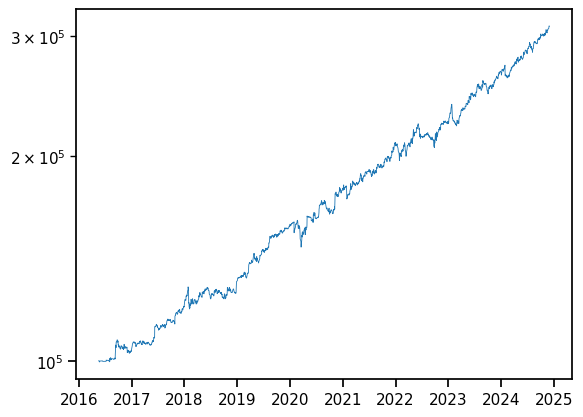

In [ ]:
plt.plot(PnL_df.index, PnL_df['Portfolio'])
#plt.plot(PnL_df.index, PnL_df['Payments'])
plt.yscale('log')
plt.show()

In [ ]:
display(PnL_df)


,Cash,Portfolio,Payments,Taxes,Margin,SPY,TLT,GLD,Strategy3,Strategy4
Datetime,,,,,,,,,,
2016-05-16,100000.000000,100000.000000,100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-05-17,100000.000000,100000.000000,100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-05-18,100000.000000,100000.000000,100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-05-19,100000.000000,100000.000000,100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-05-20,79999.000000,99999.000000,100000,0.000000,0.000000,0.000000,0.000000,0.000000,20000.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2024-11-25,-509699.922947,307830.346136,100000,-41798.139527,0.000000,51899.472525,53859.212832,46381.741711,61566.269227,603823.572788
2024-11-26,-448143.460224,307972.340078,100000,-41798.139527,0.000000,52170.465369,53650.118510,46471.643636,0.000000,603823.572788
2024-11-27,-448143.460224,308289.275729,100000,-41798.139527,0.000000,52012.386210,54021.841748,46574.935208,0.000000,603823.572788


In [ ]:
display(Positions_df)

,SPY,TLT,GLD,Strategy3,Strategy4
Datetime,,,,,
2016-05-16,0.000000,0.000000,0.000000,0.000000,0.000000
2016-05-17,0.000000,0.000000,0.000000,0.000000,0.000000
2016-05-18,0.000000,0.000000,0.000000,0.000000,0.000000
2016-05-19,0.000000,0.000000,0.000000,0.000000,0.000000
2016-05-20,0.000000,0.000000,0.000000,510.373845,0.000000
...,...,...,...,...,...
2024-11-25,86.856681,582.833452,191.280690,440.325198,4351.399354
2024-11-26,86.856681,582.833452,191.280690,0.000000,4351.399354
2024-11-27,86.856681,582.833452,191.280690,0.000000,4351.399354


In [ ]:
display(Close_df.iloc[:,0:3])

,SPY,GLD,TLT
Datetime,,,
2016-05-16,178.825046,121.80,105.796635
2016-05-17,177.156658,122.22,105.974119
2016-05-18,177.207855,120.10,104.465504
2016-05-19,176.593841,119.87,104.917282
2016-05-20,177.709443,119.71,104.997956
...,...,...,...
2024-11-25,597.530000,242.48,92.409268
2024-11-26,600.650000,242.95,92.050513
2024-11-27,598.830000,243.49,92.688300


<Axes: xlabel='Datetime'>

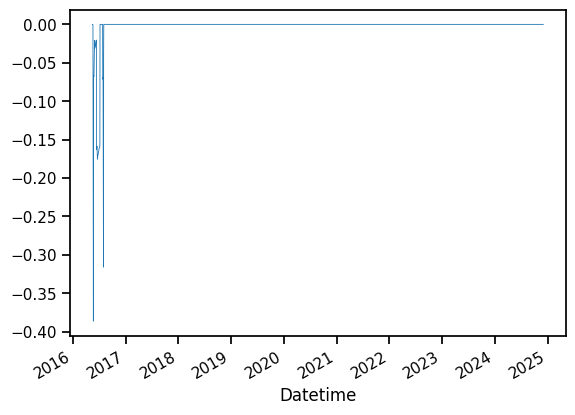

In [ ]:
PnL_df['RealDrawdown'] = 100*np.minimum(PnL_df['Portfolio'] - PnL_df['Payments'], 0) / PnL_df['Payments']

PnL_df['RealDrawdown'].plot()

<Axes: xlabel='Datetime'>

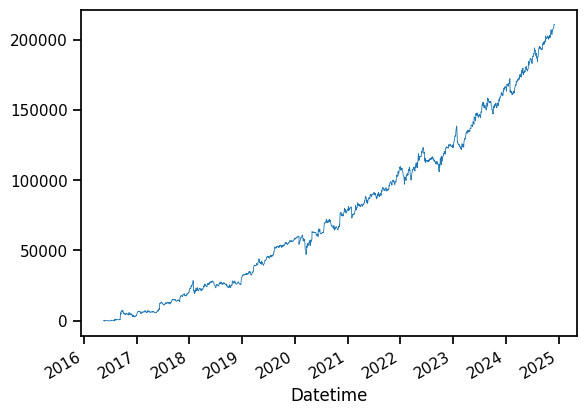

In [ ]:
PnL_df['Earnings'] = PnL_df['Portfolio'] - PnL_df['Payments']
#plt.yscale('log')
PnL_df['Earnings'].plot()

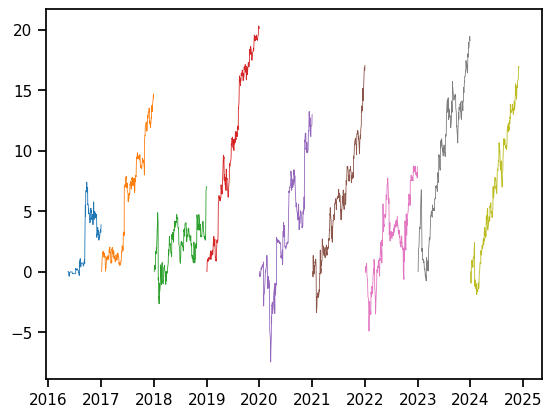

In [ ]:
for year in PnL_df.index.year.unique()[:10]:
  plt.plot(PnL_df[PnL_df.index.year==year].index, 100*(PnL_df[PnL_df.index.year==year]['Portfolio']/PnL_df[PnL_df.index.year==year]['Portfolio'].iloc[0]-1))


plt.show()

for year in PnL_df.index.year.unique()[11:]:
  plt.plot(PnL_df[PnL_df.index.year==year].index, 100*(PnL_df[PnL_df.index.year==year]['Portfolio']/PnL_df[PnL_df.index.year==year]['Portfolio'].iloc[0]-1))

#plt.yscale('log')
plt.show()

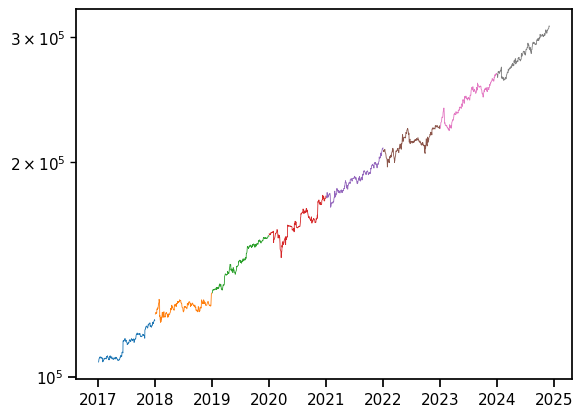

In [ ]:
for year in PnL_df.index.year.unique()[-8:]:
  plt.plot(PnL_df[PnL_df.index.year==year].index, (PnL_df[PnL_df.index.year==year]['Portfolio']))


plt.yscale('log')
plt.show()

<Axes: xlabel='Datetime'>

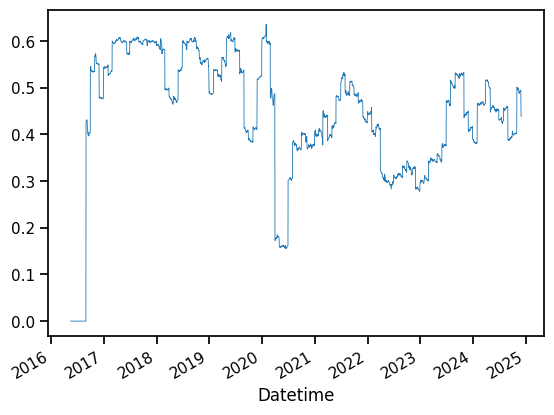

In [ ]:
CurrentWeight_df = pd.DataFrame(index=PnL_df.index, columns=symbols)

for sym in symbols:
  CurrentWeight_df[sym] = (PnL_df[sym] / PnL_df['Portfolio'])

CurrentWeight_df['Cash'] = (PnL_df['Cash'] / PnL_df['Portfolio'])

CurrentWeight_df['RP'] = CurrentWeight_df['SPY'] + CurrentWeight_df['TLT'] + CurrentWeight_df['GLD']


CurrentWeight_df['RP'].plot()

#display(CurrentWeight_df)

<Axes: xlabel='Datetime'>

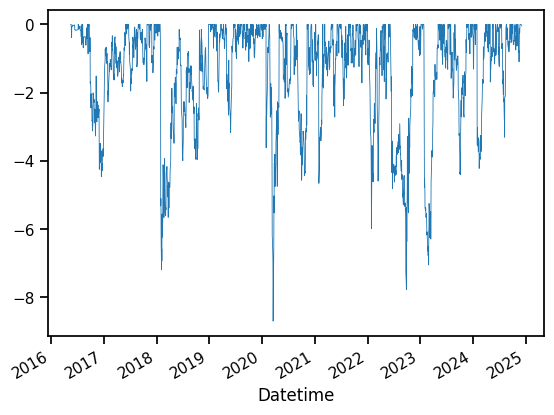

In [ ]:
PnL_df['Drawdown'] = 100 * (PnL_df['Portfolio'] - PnL_df['Portfolio'].cummax()) / PnL_df['Portfolio'].cummax()
PnL_df['Drawdown'].plot()

Volatility:  8.33541576769425
HoldingTime:  8.553424657534247
CAGR:  14.172290900580675
Sharpe Ratio:  1.7002500289797813


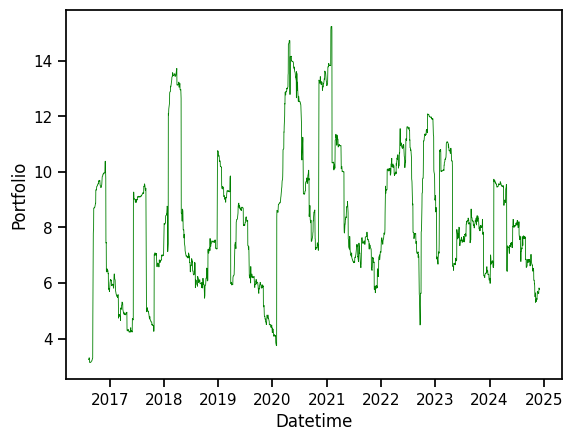

In [ ]:
ReturnsStrat_df = (PnL_df['Portfolio'] / PnL_df['Portfolio'].shift(1)).to_frame()
ReturnsStrat_df.dropna(inplace=True)
PnL_df.dropna(inplace=True)
#display(ReturnsStrat_df)

Vola_df['Portfolio'] = np.sqrt(252)*100*ReturnsStrat_df['Portfolio'].rolling(period).std()
#display(Vola_df)
#Vola_df['SPY'] = np.sqrt(252)*100*Returns_df['SPY'].rolling(period).std()
Volatility = Vola_df['Portfolio'].mean()
#Volatility_SPY = Vola_df['SPY'].mean()
HoldingTime = (pd.Timedelta(PnL_df.index[-1] - PnL_df.index[0]).days)/365
CAGR = 100 * ((PnL_df['Portfolio'].iloc[-1] / PnL_df['Portfolio'].iloc[0])**(1/HoldingTime) - 1)
print('Volatility: ',Volatility)
#print('Volatility SPY: ',Volatility_SPY)
print('HoldingTime: ',HoldingTime)
print('CAGR: ',CAGR)
print('Sharpe Ratio: ',CAGR/Volatility)

sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 0.6})
ax = sns.lineplot(x='Datetime', y='Portfolio', data=Vola_df, color="green")
#ax = sns.lineplot(x='Datetime', y='SPY', data=Vola_df, color="red")